In [1]:
# [Part 1] Understanding our data

# How many records and how many parameters?
    # 1608 Records, 12 Parameters (Not counting Condition Column)

# Is this a classification or regression issue?
    # Regression. The values are continuous as opposed to 'Male' or 'Female'

# How many different classes in the data?
    # 

# How many records for each condition?
    # Normal1 has 600 records. Condition3 has 480 records. Condition 8 has 528 records.

# How many null values for each condition under each parameter?
    # Refer to cell 'Data Tally'

In [2]:
# Data Tally
import pandas as pd

path = 'Group9 - missingdata.csv' # File Name
df = pd.read_csv(path, index_col = 'Condition') # Load File

# How many records and how many parameters?
print('How many records and how many parameters?')
print('Number of Records :', len(df.index) * (len(df.columns) - 1))
print('Number of Parameters :', len(df.columns) - 1)
print('')

# How many records for each condition?
print('How many records for each condition?')
print(df.groupby(['Condition']).size() * (len(df.columns) - 1))
print('')

# How many null values for each condition under each parameter?
print('How many null values for each condition under each parameter?')

specific = df.groupby('Condition')
n1 = specific.get_group('Normal1').isna().sum()
c3 = specific.get_group('Condition3').isna().sum()
c8 = specific.get_group('Condition8').isna().sum()

dfcountnull = pd.DataFrame({"Normal 1":n1, "Condition 3":c3, "Condition 8":c8})
dfcountnull

How many records and how many parameters?
Number of Records : 1474
Number of Parameters : 11

How many records for each condition?
Condition
Condition3    440
Condition8    484
Normal1       550
dtype: int64

How many null values for each condition under each parameter?


,Normal 1,Condition 3,Condition 8
Cylinder heating zone 1,2,2,2
Cylinder heating zone 4,3,2,2
Maximum injection pressure,3,3,2
Mould temperature control unit 1,2,2,2
Cycle time,2,2,2
Cylinder heating zone 5,2,2,2
Injection time,2,2,2
Cylinder heating zone 2,2,2,2
Dosage time,2,2,2
Cylinder heating zone 3,2,2,2


In [3]:
# Data Cleaning
import pandas as pd

path = 'Group9 - missingdata.csv' # File Name
df = pd.read_csv(path, index_col = 'Condition') # Load File

# Check for null on first and last row of Normal 1 and fill with appropriate method
specific = df.groupby('Condition')
n1 = specific.get_group('Normal1')

if n1.head(1).isnull().values.any() == True: # Backward fill if null is found
    n1 = n1.fillna(method='bfill')
    
if n1.tail(1).isnull().values.any() == True: # Forward fill if null is found
    n1 = n1.fillna(method='ffill')

n1 = n1.interpolate() # Interpolate if there are no null on first and last row

# Check for null on first and last row of Condition 3 and fill with appropriate method
specific = df.groupby('Condition')
c3 = specific.get_group('Condition3')

if c3.head(1).isnull().values.any() == True: # Backward fill if null is found
    c3 = c3.fillna(method='bfill')
    
if c3.tail(1).isnull().values.any() == True: # Forward fill if null is found
    c3 = c3.fillna(method='ffill')

c3 = c3.interpolate() # Interpolate if there are no null on first and last row

# Check for null on first and last row of Condition 8 and fill with appropriate method
specific = df.groupby('Condition')
c8 = specific.get_group('Condition8')

if c8.head(1).isnull().values.any() == True: # Backward fill if null is found
    c8 = c8.fillna(method='bfill')
    
if c8.tail(1).isnull().values.any() == True: # Forward fill if null is found
    c8 = c8.fillna(method='ffill')

c8 = c8.interpolate() # Interpolate if there are no null on first and last row

# Stack all clean data together
dfclean = pd.concat([n1, c3, c8])
dfclean = dfclean.round(3)

#Save to CSV
dfclean.to_csv('Group9 - cleandata' + '.csv', index=True)

#Save to Excel
dfclean.to_excel('Group9 - cleandata' + '.xlsx', index=True)

In [4]:
# [Part 2] Statistical Analysis of cleaned data

# Calculate Mean, Median, Mode, Range and Standard Deviation of data
    # Refer to respective cell's 'Calculate Mean, Median, Mode, Range and Standard Deviation of data'

# Use correlation analysis for the different parameters to find correlations and analysis result
    # Refer to cell 'Correlation Analysis'

In [5]:
# Calculate Mean, Median, Mode, Range and Standard Deviation
import pandas as pd

path2 = 'Group9 - cleandata.csv' # File Name
cleandf = pd.read_csv(path2, index_col = 'Condition') # Load File

# Variable declaration
cdfn = cleandf.filter(like = 'Normal', axis = 0)
cdf3 = cleandf.filter(like = '3', axis = 0)
cdf8 = cleandf.filter(like = '8', axis = 0)

# Create dataframe with calculated parameters for Normal 1
cdfn_data = pd.DataFrame({'N1 Mean':round(cdfn.mean(), 3), 'N1 Median':round(cdfn.median(), 3), 'N1 Range':round(cdfn.max() - cdfn.min(), 3), 'N1 Std':round(cdfn.std(), 3)})

cdfnMode = round(cdfn.mode().head(1).transpose(),3) # To get mode
cdfnMode.columns = ['N1 Mode'] # Rename column
cdfn_data = pd.concat([cdfn_data, cdfnMode], axis = 1) # Combine
cdfn_data = cdfn_data[['N1 Mean', 'N1 Median', 'N1 Mode', 'N1 Range', 'N1 Std']]

# Create dataframe with calculated parameters for Condition 3
cdf3_data = pd.DataFrame({'C3 Mean':round(cdf3.mean(), 3), 'C3 Median':round(cdf3.median(), 3), 'C3 Range':round(cdf3.max() - cdf3.min(), 3), 'C3 Std':round(cdf3.std(), 3)})

cdf3Mode = round(cdf3.mode().head(1).transpose(),3) # To get mode
cdf3Mode.columns = ['C3 Mode'] # Rename column
cdf3_data = pd.concat([cdf3_data, cdf3Mode], axis = 1) # Combine
cdf3_data = cdf3_data[['C3 Mean', 'C3 Median', 'C3 Mode', 'C3 Range', 'C3 Std']]

# Create dataframe with calculated parameters for Condition 8
cdf8_data = pd.DataFrame({'C8 Mean':round(cdf8.mean(), 3), 'C8 Median':round(cdf8.median(), 3), 'C8 Range':round(cdf8.max() - cdf8.min(), 3), 'C8 Std':round(cdf8.std(), 3)})

cdf8Mode = round(cdf8.mode().head(1).transpose(),3) # To get mode
cdf8Mode.columns = ['C8 Mode'] # Rename column
cdf8_data = pd.concat([cdf8_data, cdf8Mode], axis = 1) # Combine
cdf8_data = cdf8_data[['C8 Mean', 'C8 Median', 'C8 Mode', 'C8 Range', 'C8 Std']]

# Combine all data
cdfcom_data = pd.concat([cdfn_data, cdf3_data, cdf8_data], axis = 1)

# Sort parameters so easier to see
cdfcom_data = cdfcom_data.sort_index()

cdfcom_data

,N1 Mean,N1 Median,N1 Mode,N1 Range,N1 Std,C3 Mean,C3 Median,C3 Mode,C3 Range,C3 Std,C8 Mean,C8 Median,C8 Mode,C8 Range,C8 Std
Cycle time,28.937,28.980,28.392,2.850,0.893,28.762,28.714,27.728,2.788,0.930,28.967,28.871,27.704,2.672,0.812
Cylinder heating zone 1,278.890,278.730,266.100,27.050,8.369,281.076,281.275,286.310,26.720,7.953,280.854,280.670,266.200,26.590,7.821
Cylinder heating zone 2,295.497,295.035,294.970,29.310,8.408,295.484,295.580,284.320,26.270,8.633,294.723,293.840,280.660,28.690,9.028
Cylinder heating zone 3,307.662,307.235,294.720,30.640,9.005,307.502,305.345,300.570,28.320,8.329,308.778,307.630,307.630,30.100,9.126
Cylinder heating zone 4,311.224,313.375,294.770,29.520,7.915,309.298,309.315,311.870,29.860,8.386,314.449,315.315,294.510,30.770,8.165
Cylinder heating zone 5,316.538,319.265,302.440,31.230,9.886,320.638,321.680,323.580,23.530,7.044,314.606,314.465,299.420,30.600,8.730
Dosage time,2.944,2.941,2.866,0.328,0.084,2.864,2.866,2.698,0.340,0.092,2.862,2.875,2.816,0.322,0.086
Injection time,0.237,0.239,0.204,0.100,0.030,0.216,0.208,0.208,0.080,0.023,0.308,0.312,0.344,0.120,0.033
Material cushion,0.944,0.947,0.937,0.115,0.025,1.059,1.066,1.015,0.138,0.035,1.011,1.013,1.032,0.123,0.039
Maximum injection pressure,1534.605,1538.085,1440.630,186.110,50.186,1543.647,1551.310,1562.210,163.440,46.719,1389.435,1398.430,1311.990,164.240,43.638


<AxesSubplot:>

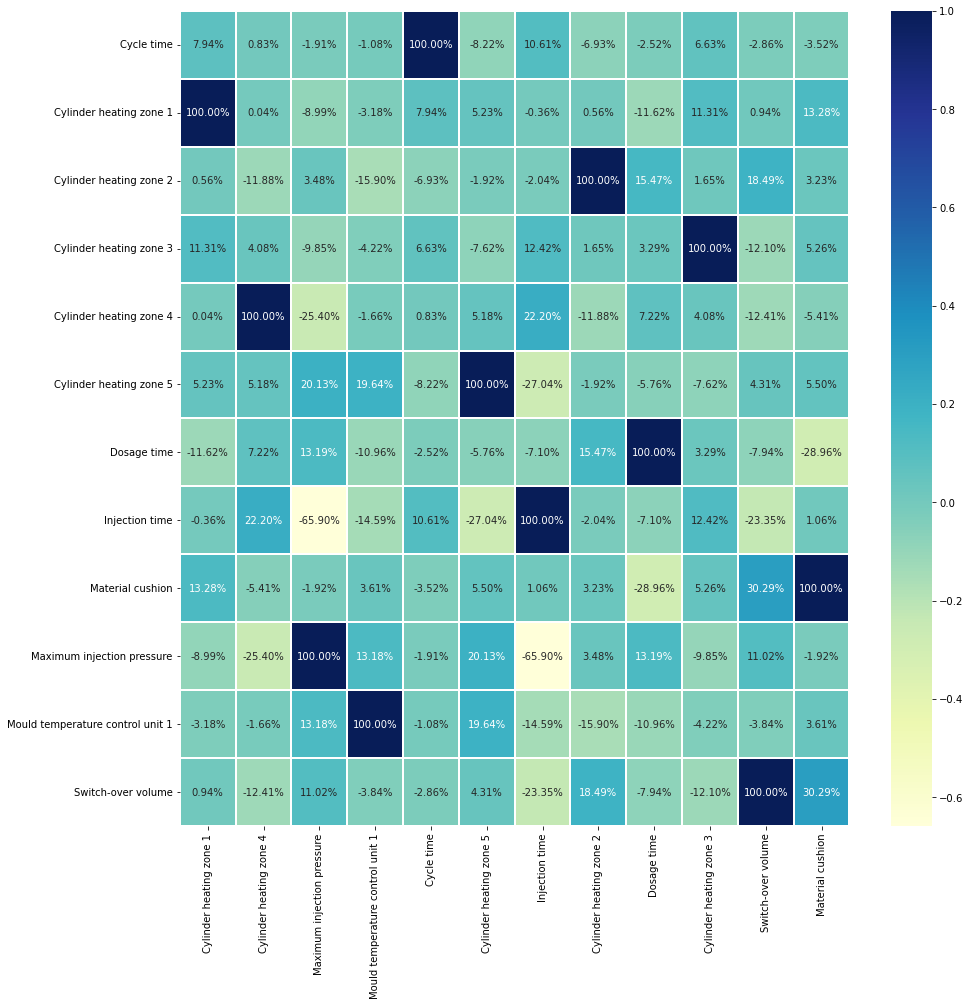

In [6]:
# Correlation Analysis (Heatmap for ALL)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path3 = 'Group9 - cleandata.csv' # File Name
corr = pd.read_csv(path3) # Load File

# Plot correlation matrix
corrmat = corr.corr()
corrmat = corrmat.sort_index() # Comment this line if you want a linear heatmap

f, ax = plt.subplots(figsize =(15, 15))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True, fmt=".2%")

Accuracy: 0.96


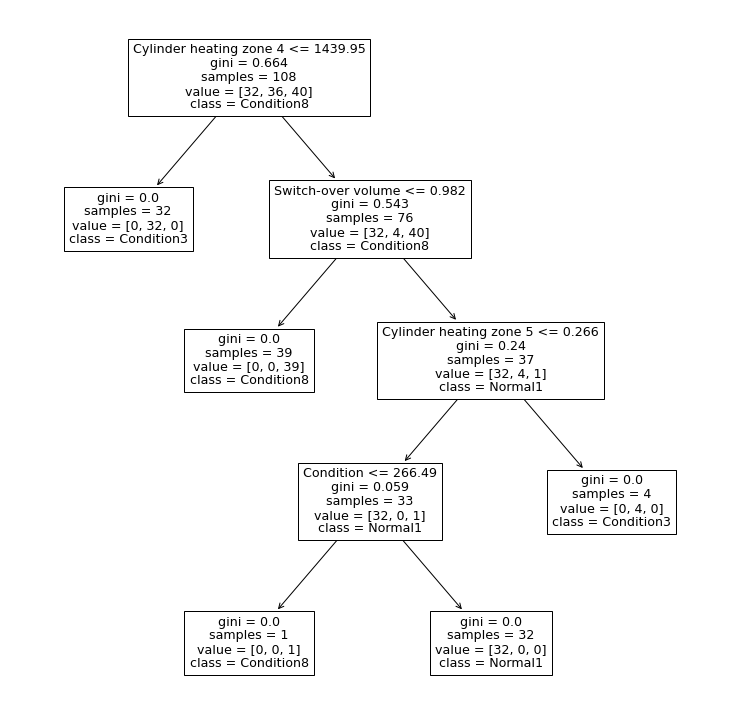

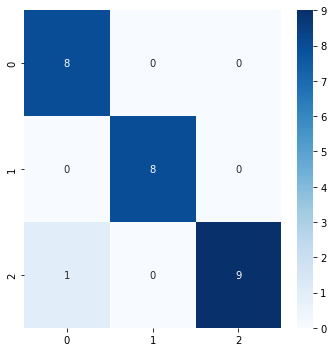

In [7]:
# Decision Tree Classifier
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree

path4 = 'Group9 - cleandata.csv' # File Name
decision = pd.read_csv(path4) # Load File
decisionN = decision.copy()

# Load data
del decisionN['Condition']
decisionN.columns = range(decisionN.columns.size)
X = decisionN

#decision = decision.replace(to_replace = "Normal1", value = 0)
#decision = decision.replace(to_replace = "Condition3", value = 1)
#decision = decision.replace(to_replace = "Condition8", value = 2)
decision_y = decision['Condition'].to_numpy()
y = pd.DataFrame(decision_y)

feature_names = list(decision)
target_names = decision['Condition'].unique()

# Create Save Path
path = os.getcwd()
savePath = path + '\DT Results'

# Define Decision Model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

# Split data into 5 folds
cv = sk(n_splits = 5, shuffle = True, random_state = 0)

# Accuracy List
accuracy_l = []

# Result List
result_matrix =[]

# Split data to Train and Test
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
# Fit Decision Tree Model and Predict y_p
model2.fit(X_tr, y_tr)
y_p = model2.predict(X_v)

# Calculate Accuracy
accuracy = np.mean(acs(y_v, y_p)).round(2)
print("Accuracy:", accuracy)
accuracy_l.append(accuracy)

# Plot and Save Decision Tree
fig = plt.figure(figsize=(13, 13))
tree.plot_tree(model2, feature_names = feature_names, class_names = target_names, filled=False)
plt.savefig(savePath + '\\' + 'Group 9_' + str(len(accuracy_l)) + '_' + 'decisionTree.png')

# Use Confusion Matrix to compare y_v and y_p, Plot and Save Confusion Matrix
fig, ax = plt.subplots(figsize=(5,5))

# Use Heatmap
ax = sns.heatmap(confusion_matrix(y_v, y_p), annot = True, fmt = 'd', cmap = 'Blues')
plt.tight_layout()
plt.savefig(savePath + '\\' + 'Group 9_' + str(len(accuracy_l)) + 'confusionMatrix.png')

# Reset the label to original and save the original test data +prediction into a .csv file
X_v.reset_index(drop=True, inplace=True)
y_v.reset_index(drop=True,inplace=True)

result_matrix = pd.concat([X_v, y_v], axis = 1, ignore_index = True)
result_matrix.loc[:,5] = y_p

result_matrix.to_csv(savePath + '\\' + 'Group 9_cv_' + str(len(accuracy_l)) + '.csv', index = False)